# **Intro to Quantum Computing**

Welcome to the Vagelos Computational Science Center's Intro to Quantum Computing workshop! Today we'll be using Qiskit, IBM's quantum simulation software development kit. Qiskit is compatible with Python, so we'll also cover a few basics of Python along the way. Qiskit has pretty extensive documentation, helpful tutorials, and a textbook. We'll introduce a some basics concepts here, and if you're interested in learning more after this workshop I highly recommend you check out some of their materials [here](https://qiskit.org/textbook/ch-states/introduction.html).


Today we'll:

1.   Cover the basics of Qiskit
2.   Explore basic quantum circuits with one and two qubits





---


## Getting set up

#### *Make an IBMQ account*
First, let's visit [IBM's website](https://quantum-computing.ibm.com/) to set up an account. IBM allows users to send jobs to some of their machines, but you'll need to set up an account. (You can skip this step if you want to use the quantum computer simulator only.)

#### *Install Qiskit*
Google Colab allows us to run Python programs without installing Python onto your machine.  But before we get started, we need to install and import Qiskit, the software development kit we'll be using today to run our quantum simulator and interface with an IBM quantum computer.

We can usually install software packages using the command `pip install` in the command line. In Google Colab (or Jupyter notebook), we let Colab know that we're running a command line script (as opposed to a Python cell) by writing `!` before the line.

Run the following line of code to install Qiskit: `!pip install qiskit`

In [ ]:
# install Qiskit
!pip install qiskit

Before we get started with Qiskit and quantum circuits, let's cover a few basics of Python that we'll be working with today.

In Python, we can assign a variable using the `=` symbol.

In [ ]:
# assign a variable to a number
a = 1
print(a)

1


We also work with different types (or "classes") of objects or data.

In [ ]:
# create two variables of different types
a_string = "Hello world!"
an_integer = 2

print(type(a_string))
print(type(an_integer))

<class 'str'>
<class 'int'>


We can pass arguments (objects or their variables) to functions.  In our example above, `print()` is a function with `type(a_string)` as the argument. [`type()` is also a function, with `a_string` being its argument!]

In Qiskit, we'll be working with some (slightly less intuitive) functions—don't worry if you don't understand exactly what the function is doing.  The most important thing is to know: when to use a function and what arguments that function needs.



---


## Working with Qiskit

Now that we're a little more warmed up with Python, let's start working with Qiskit. We've installed Qiskit, but now we need to import Qiskit so we can access its functions.

In [ ]:
# import Qiskit
import qiskit
# OR
from qiskit import *

#### *One-qubit circuit*

Let's start by creating a one-qubit circuit.  Our basic workflow in Qiskit will look something like:

1.   Define quantum and classical registers
2.   Create a circuit and add gates
3.   Define a `backend` and `execute` the circuit
4.   Read out results

For our one-qubit circuit, we can go ahead and define our registers.

In [ ]:
# one qubit quantum circuit

# define quantum and classical registers
one_qubit = QuantumRegister(1)
one_bit = ClassicalRegister(1) #for a one-qubit circuit, we need one bit

Create a circuit from these registers.

In [ ]:
# create a circuit with these registers
circuit = QuantumCircuit(one_qubit, one_bit)

# draw circuit to see what it looks like
circuit.draw()

q0: 
      
c0: 1/

Let's make a measurement on our qubit.

In [ ]:
# make measurement on qubit
circuit.measure(one_qubit, one_bit) #have to be the same length
circuit.draw()

┌─┐
  q0: ┤M├
      └╥┘
c0: 1/═╩═
       0

Now we need to run our circuit to see results.

First, tell Qiskit what "backend" you want to use. Today we'll use "QASM," a backend that simulates how a quantum computer works using a classical computer.

In [ ]:
# define which backend you want to use
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 100).result()

Let's plot this quickly using Qiskit's plot_histogram.

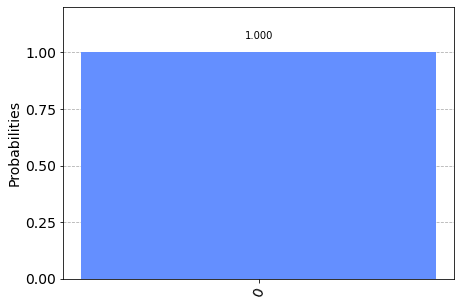

In [ ]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

As you can see, over 100 test measurements (`shots`), our qubit is in state `0` 100% of the time.  This is because when we initialize a qubit, its default state at the beginning of the circuit is `0` with 100% probability.

If we want to put our qubit into a state of superposition, we need to operate on it by adding some gates to our circuit.

In [ ]:
# add a Hadamard gate to put our qubit in superposition
circuit.h(one_qubit[0])
circuit.draw()

┌─┐┌───┐
  q0: ┤M├┤ H ├
      └╥┘└───┘
c0: 1/═╩══════
       0

Add a measurement on our qubit.  But before we plot our results, what probability distribution are we expecting between the `0` and `1` state? Recall that a Hadamard gate on one qubit produces the state: `|Q⟩ = 1/√2 |0⟩ + 1/√2 |1⟩`

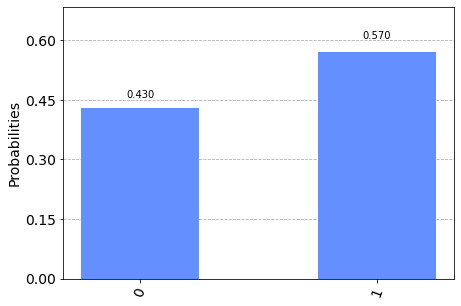

In [ ]:
# measure our qubit
circuit.measure(one_qubit, one_bit)
superp_result = execute(circuit, backend = simulator, shots = 100).result()
plot_histogram(superp_result.get_counts(circuit))

What happens if we simulate the circuit over a greater number of shots?

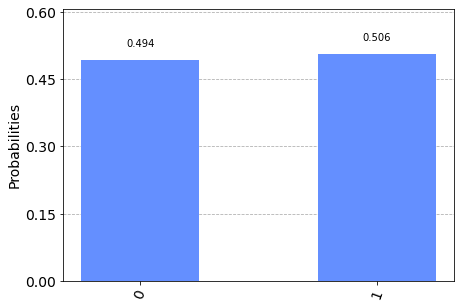

In [ ]:
superp_result = execute(circuit, backend = simulator, shots = 5000).result()
plot_histogram(superp_result.get_counts(circuit))

As you can see, we can get much closer to the theoretical probability distribution using a greater number of shots (a greater sample size).

#### *Two-qubit circuit*

Let's try making a slightly more complicated circuit using two qubits.  If we want to measure both qubits, we'll also need two classical bits.

In [ ]:
# define quantum and classical registers
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

# put registers in a circuit
new_circuit = QuantumCircuit(qr, cr)

Add a Hadamard gate on the first qubit.

In [ ]:
# add a Hadamard gate on the first qubit
new_circuit.h(qr[0])
new_circuit.draw()
new_circuit.measure(qr, cr)

Check the results from this.

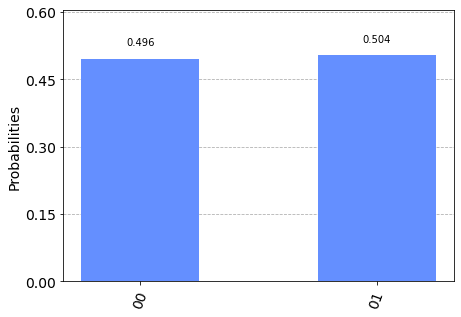

In [ ]:
# check the results of the Hadamard
simulator = Aer.get_backend('qasm_simulator') #two backends
result = execute(new_circuit, backend = simulator, shots = 1000).result()
plot_histogram(result.get_counts(new_circuit))

How do we read these results? We read the state, |00⟩ or |01⟩, from right to left.  So the state |00⟩ says that both qubits are in the |0⟩ state and |01⟩ says that the first qubit is in |1⟩ and the second qubit is in |0⟩.  

In both system states, |00⟩ and |01⟩ (denoted by double binary digits), the second qubit (farthest left) is in state |0⟩.  While our Hadamard gate has put the first qubit in a superposition of |0⟩ and |1⟩, our second qubit is still in its default state of |0⟩.

Now, create a circuit with an entangeled state by conditioning the state of the second qubit on the first.

In [ ]:
# create entanglement by adding a CX/CNOT gate
# define quantum and classical registers
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

# put registers in a circuit
ent_circuit = QuantumCircuit(qr, cr)
ent_circuit.h(qr[0])
ent_circuit.cx(qr[0], qr[1])
ent_circuit.measure(qr, cr)

ent_circuit.draw()

┌───┐     ┌─┐   
q47_0: ┤ H ├──■──┤M├───
       └───┘┌─┴─┐└╥┘┌─┐
q47_1: ─────┤ X ├─╫─┤M├
            └───┘ ║ └╥┘
 c2: 2/═══════════╩══╩═
                  0  1

Before we run our circuit: What state have we just created? What probability do we expect?

Now let's try running and plotting results.

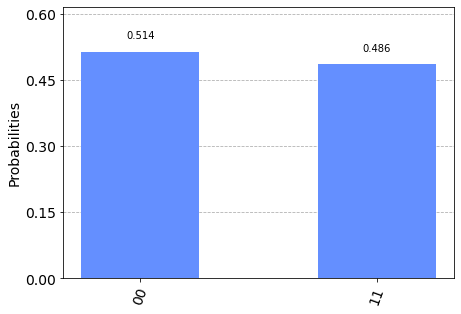

In [ ]:
# run the circuit
simulator = Aer.get_backend('qasm_simulator') #two backends
result = execute(ent_circuit, backend = simulator, shots = 1000).result()
plot_histogram(result.get_counts(ent_circuit))

Q: How do we read these results?

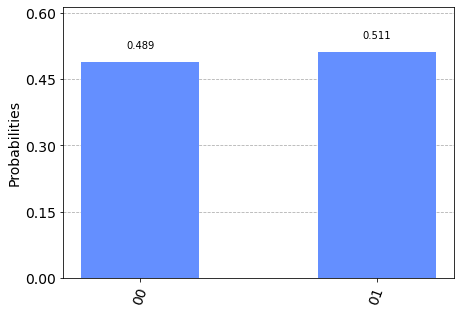

In [ ]:
# try to add another CNOT
new_circuit.cx(qr[0], qr[1]) #qr and cr need to be the same length
new_circuit.draw()

new_circuit.measure(qr, cr) #qr and cr need to be the same length
new_circuit.draw()
result = execute(new_circuit, backend = simulator, shots = 1000).result()
plot_histogram(result.get_counts(new_circuit))

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('your_token')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

qcomp = provider.get_backend("ibmq_santiago")
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

configrc.store_credentials:WARNING:2022-04-08 15:26:36,640: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-04-08 15:26:37,176: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job is queued (10)    

KeyboardInterrupt: ignored

In [ ]:
result = job.result()
plot_histogram(result.get_counts(circuit))